# Exploratory Data Analysis on Text Data

In this notebook I will do an Exploratory Data Analysis on Tripadvisor Hotel Reviews. You can find the data [here](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews). 

## Table of Content:
- Import
- Load data and first overview
- Preprocessing
- Length and Word Count
- Frequency Words
- Frequency Bigrams

# Import

In [1]:
## necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pulpl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load data and first overview

In [2]:
## load data and first 10 rows
data = pd.read_csv("reviews.csv")
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [3]:
## shape of data
rows,cols = data.shape[0],data.shape[1]
print(f"Shape of data: {rows} rows and {cols} columns")

Shape of data: 20491 rows and 2 columns


In [4]:
## info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
## rating values
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [6]:
## check missing values
data.isnull().sum()

Review    0
Rating    0
dtype: int64

# Preprocessing
Create sentiment target variable.
If rating is 4 or 5, sentiment will be POSITIVE. If rating is 1 or 2, sentiment will be NEGATIVE. Otherwise, sentiment will be NEUTRAL.

In [7]:
def create_sentiment(rating):
    if rating >= 4:
        return "positive"
    if rating < 3:
        return "negative"
    return "neutral"

In [8]:
## apply function on dataset
data['Sentiment'] = data['Rating'].apply(create_sentiment)

In [9]:
data['Sentiment'].value_counts()

positive    15093
negative     3214
neutral      2184
Name: Sentiment, dtype: int64

We will create a Pie Chart with Sentiment values

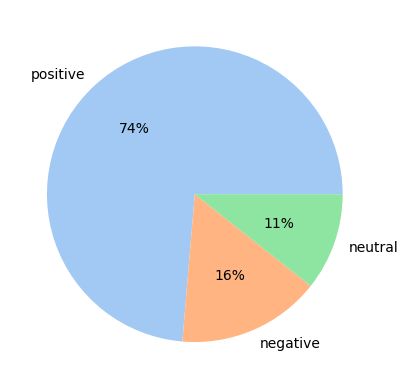

In [10]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(data['Sentiment'].value_counts(), labels=data['Sentiment'].unique().tolist(), colors = colors, autopct='%.0f%%')
plt.show()

# Length and Word Count

In [11]:
## create function to count words in review
def get_word_count(review):
  return len(review.split())

## apply function to dataset
data["Word Count"] = data["Review"].apply(get_word_count)

In [12]:
## length of reviews
data["Len Review"] = data["Review"].apply(lambda row: len(row))

In [13]:
## statistics about reviews
data[["Word Count", "Len Review"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Word Count,20491.0,104.375824,100.656586,7.0,48.0,77.0,124.0,1931.0
Len Review,20491.0,724.896833,689.101024,44.0,339.0,537.0,859.0,13501.0


Now we will explore stats difference between positive, negative and neutral reviews

In [14]:
## word count for sentiment
word_count_avg_positive = data[data["Sentiment"]=="positive"]["Word Count"].mean()
word_count_avg_neutral = data[data["Sentiment"]=="neutral"]["Word Count"].mean()
word_count_avg_negative = data[data["Sentiment"]=="negative"]["Word Count"].mean()

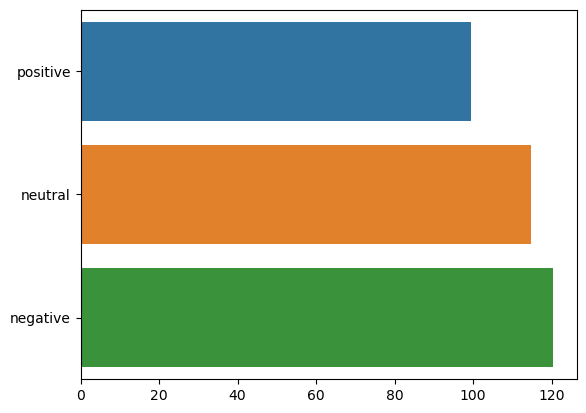

In [15]:
## create barplot with word of reviews for sentiment
data_word_count_avg = dict(zip(["positive","neutral","negative"], [word_count_avg_positive,word_count_avg_neutral,word_count_avg_negative]))
sns.barplot(x=list(data_word_count_avg.values()), y=list(data_word_count_avg.keys()))
plt.show()

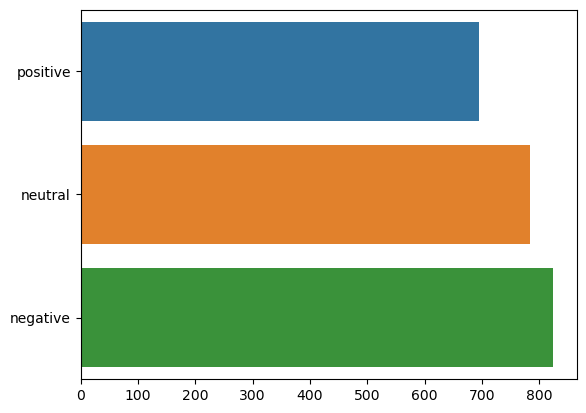

In [16]:
## length review for sentiment
len_review_avg_positive = data[data["Sentiment"]=="positive"]["Len Review"].mean()
len_review_avg_neutral = data[data["Sentiment"]=="neutral"]["Len Review"].mean()
len_review_avg_negative = data[data["Sentiment"]=="negative"]["Len Review"].mean()

## create barplot with length of reviews for sentiment
data_len_review_avg = dict(zip(["positive","neutral","negative"], [len_review_avg_positive,len_review_avg_neutral,len_review_avg_negative]))
sns.barplot(x=list(data_len_review_avg.values()), y=list(data_len_review_avg.keys()))
plt.show()

# Frequency Words

In [17]:
## create a function to clean text
## lowercase, remove punctutations, remove stopword

def clean_text(review):
    sw = stopwords.words('english')
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in sw])
    return review

data["Clean Review"] = data["Review"].apply(clean_text)

In [18]:
## shape of review after cleaning phase
data["Clean Review"][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [19]:
## create corpus: aggregate all reviews together
corpus = " ".join(data["Review"].tolist())

In [20]:
## first characters of corpus
corpus[:1000]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,   ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike 

In [21]:
## 20 most common words in all reviews
most_common_words = Counter(corpus.split()).most_common(20)
most_common_words

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376),
 ('no', 11360),
 ('rooms', 10935),
 ('nice', 10918),
 ('stayed', 10022),
 ('location', 9515),
 ('service', 8549),
 ('breakfast', 8407),
 ('beach', 8218),
 ('food', 8026),
 ('like', 7677)]

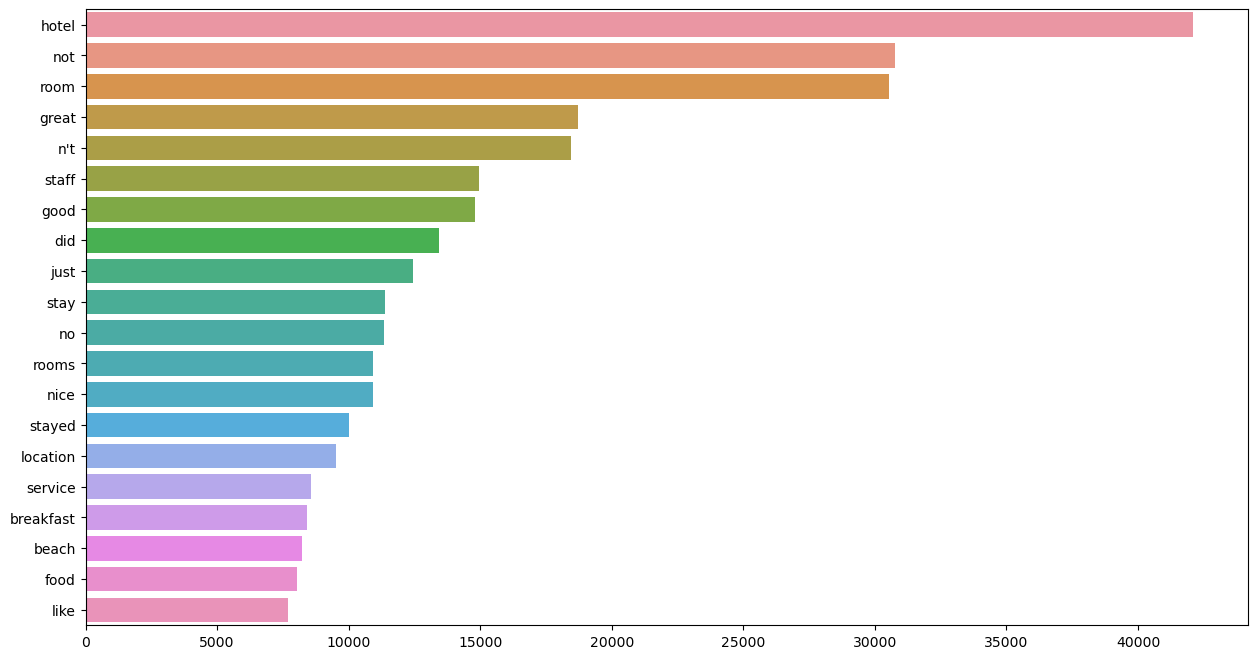

In [22]:
## create barchart with words and freqs
words = []
freq = []
for word, count in most_common_words:
    words.append(word)
    freq.append(count)

plt.figure(figsize=(15, 8))
sns.barplot(x=freq, y=words)
plt.show()

In [23]:
def create_most_common_by_sentiment(data,sentiment,n_word):
    tmp_data = data[data["Sentiment"]==sentiment]
    tmp_corpus = " ".join(tmp_data["Review"].tolist())
    most_common_words_by_sentiment = Counter(tmp_corpus.split()).most_common(n_word)
    words = []
    freq = []
    for word, count in most_common_words_by_sentiment:
        words.append(word)
        freq.append(count)
    return most_common_words_by_sentiment, words, freq

In [24]:
most_common_words_by_sentiment_positive, words_positive, freq_positive = create_most_common_by_sentiment(data,"positive",20)
most_common_words_by_sentiment_positive

[('hotel', 30969),
 ('room', 20095),
 ('not', 17415),
 ('great', 16165),
 ("n't", 12056),
 ('staff', 11488),
 ('good', 10795),
 ('just', 8969),
 ('did', 8519),
 ('stay', 8278),
 ('nice', 8163),
 ('rooms', 7578),
 ('stayed', 7550),
 ('location', 7494),
 ('breakfast', 6564),
 ('no', 6283),
 ('clean', 5998),
 ('beach', 5857),
 ('service', 5844),
 ('really', 5598)]

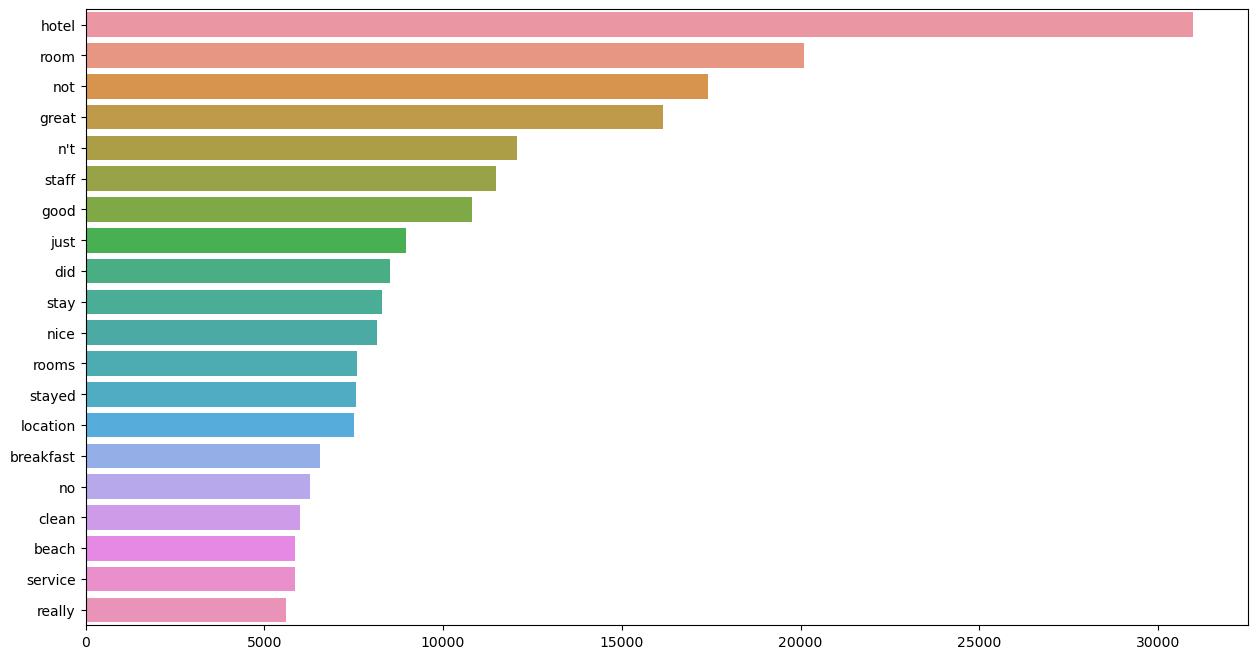

In [25]:
plt.figure(figsize=(15, 8))
sns.barplot(x=freq_positive, y=words_positive)
plt.show()

In [26]:
most_common_words_by_sentiment_neutral, words_neutral, freq_neutral = create_most_common_by_sentiment(data,"neutral",20)
most_common_words_by_sentiment_neutral

[('not', 4629),
 ('hotel', 4467),
 ('room', 3937),
 ("n't", 2508),
 ('good', 2167),
 ('did', 1873),
 ('no', 1610),
 ('great', 1536),
 ('nice', 1524),
 ('just', 1450),
 ('staff', 1371),
 ('rooms', 1361),
 ('location', 1217),
 ('stay', 1099),
 ('beach', 1078),
 ('like', 1070),
 ('stayed', 1061),
 ('food', 1040),
 ('service', 970),
 ('night', 969)]

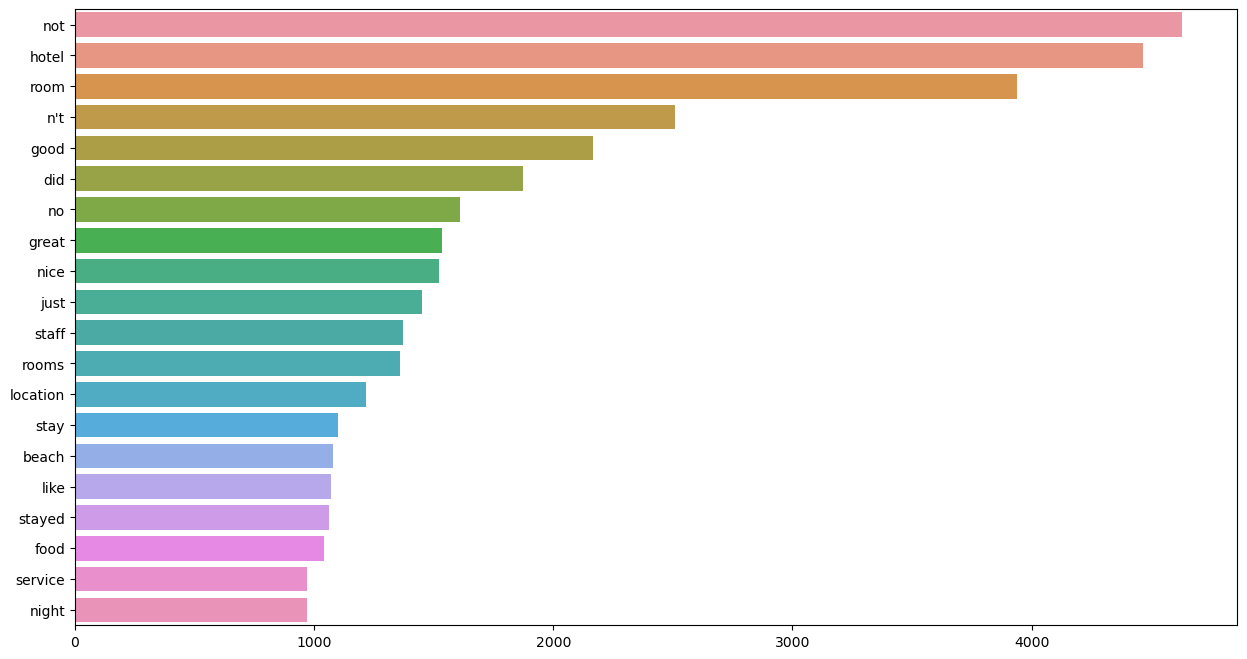

In [27]:
plt.figure(figsize=(15, 8))
sns.barplot(x=freq_neutral, y=words_neutral)
plt.show()

In [28]:
most_common_words_by_sentiment_negative, words_negative, freq_negative = create_most_common_by_sentiment(data,"negative",20)
most_common_words_by_sentiment_negative

[('not', 8706),
 ('hotel', 6643),
 ('room', 6500),
 ("n't", 3872),
 ('no', 3467),
 ('did', 3041),
 ('staff', 2091),
 ('just', 2039),
 ('stay', 1999),
 ('rooms', 1996),
 ('good', 1829),
 ('service', 1735),
 ('like', 1635),
 ('night', 1613),
 ('day', 1567),
 ('food', 1493),
 ('time', 1433),
 ('got', 1427),
 ('stayed', 1411),
 ('told', 1361)]

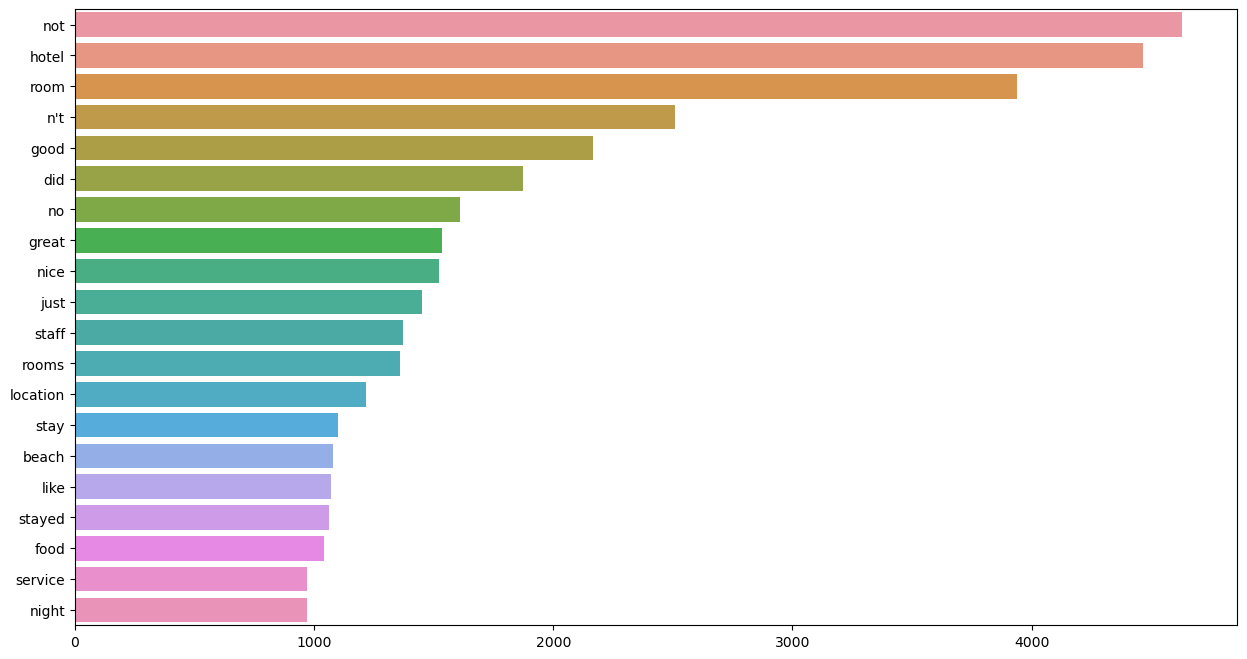

In [29]:
plt.figure(figsize=(15, 8))
sns.barplot(x=freq_neutral, y=words_neutral)
plt.show()

# Frequency Bigrams
Bigram is a sequence of two words like "really nice" or "all bad"

In [30]:
## create bigram with CountVectorizer by sentiment

cv = CountVectorizer(ngram_range=(2,2),min_df=5) ## Eliminating words that appeared in less than 5 documents:

def create_bigrams_by_sentiment(data,sentiment,cv):
    tmp_data = data[data["Sentiment"]==sentiment]
    tmp_bigrams = cv.fit_transform(tmp_data["Review"])
    count_values_sentiment = tmp_bigrams.toarray().sum(axis=0)
    df_bigrams_sentiment = pd.DataFrame(sorted([(count_values_sentiment[i], k) for k, i in cv.vocabulary_.items()], reverse = True), columns=["frequency", "bigrams"])
    return df_bigrams_sentiment

## Positive

In [31]:
data_bigram_positive = create_bigrams_by_sentiment(data,"positive",cv).head(10)

In [32]:
data_bigram_positive

,frequency,bigrams
0,2137,did not
1,1829,great location
2,1739,staff friendly
3,1390,great hotel
4,1277,friendly helpful
5,1267,hotel great
6,1263,walking distance
7,1184,recommend hotel
8,1168,punta cana
9,996,highly recommend


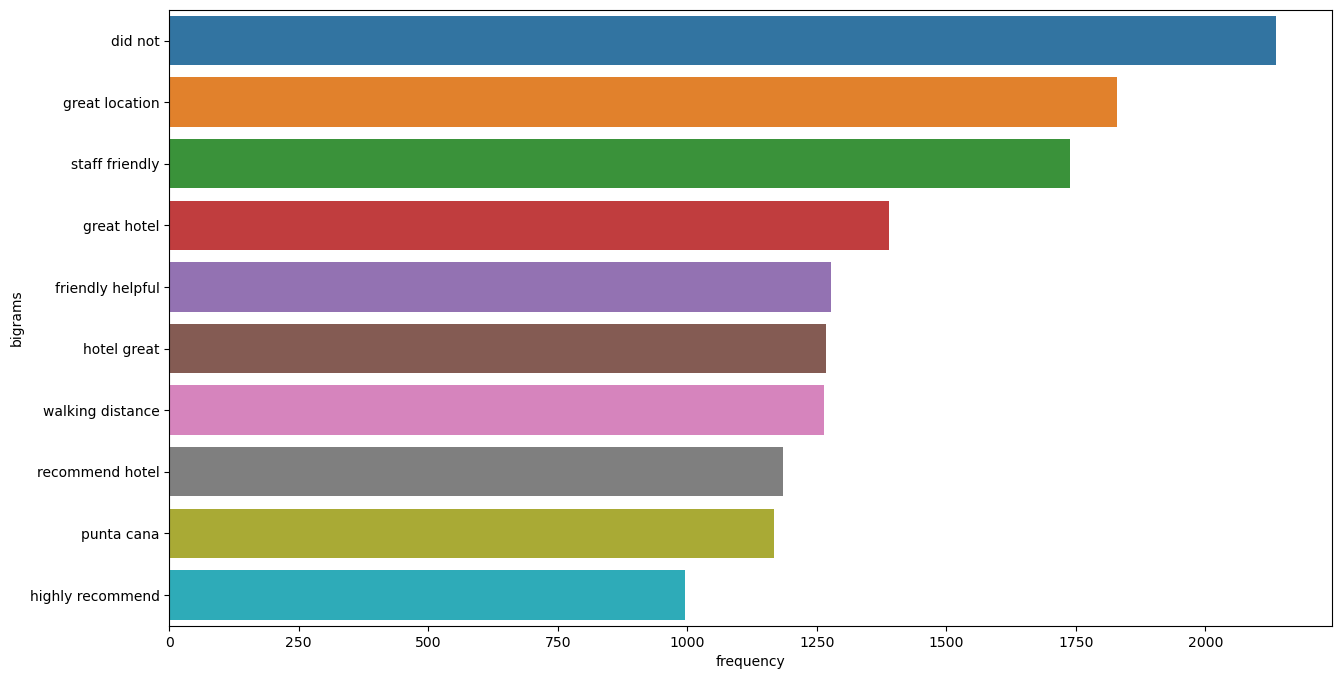

In [33]:
plt.figure(figsize=(15, 8))
sns.barplot(x=data_bigram_positive['frequency'], y=data_bigram_positive['bigrams'])
plt.show()

## Neutral

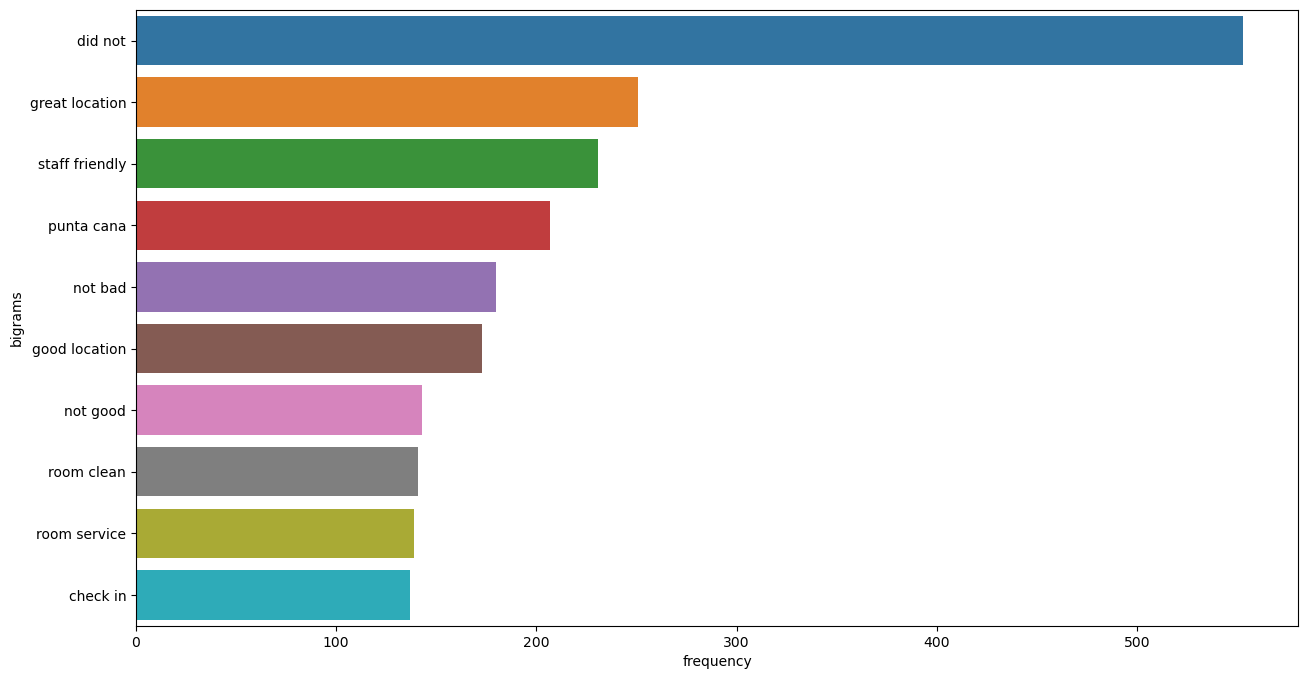

In [34]:
data_bigram_neutral = create_bigrams_by_sentiment(data,"neutral",cv).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(x=data_bigram_neutral['frequency'], y=data_bigram_neutral['bigrams'])
plt.show()

## Negative

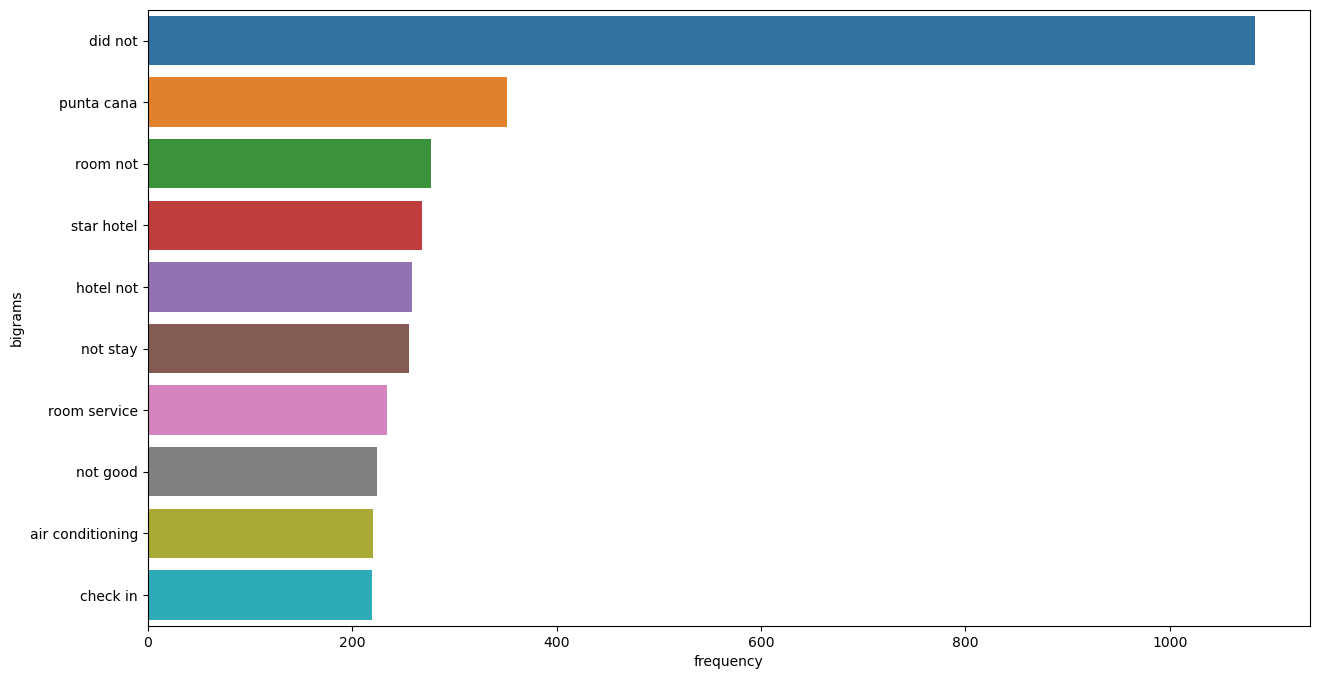

In [35]:
data_bigram_negative = create_bigrams_by_sentiment(data,"negative",cv).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(x=data_bigram_negative['frequency'], y=data_bigram_negative['bigrams'])
plt.show()